<a href="https://colab.research.google.com/github/sudhamsalagar123/NeuroNexus/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d brendan45774/test-file


Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0


In [6]:
!unzip test-file.zip

Archive:  test-file.zip
  inflating: tested.csv              


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [8]:
# Load the dataset
df = pd.read_csv('/content/tested.csv')

In [9]:
# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [10]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [12]:
# Split data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



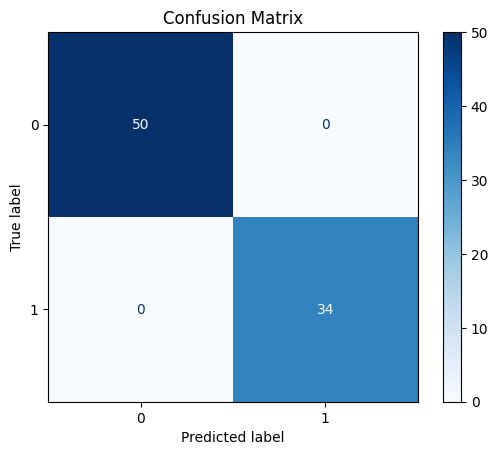

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


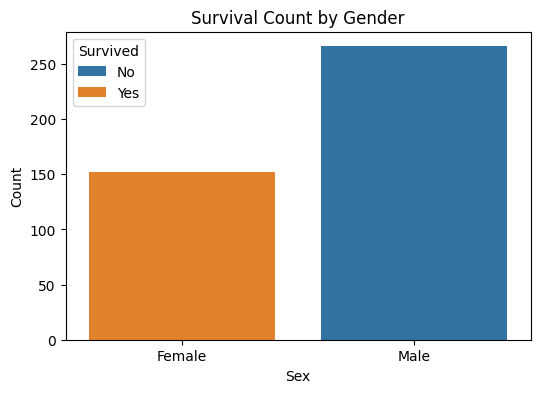

In [22]:

#Survival Count by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

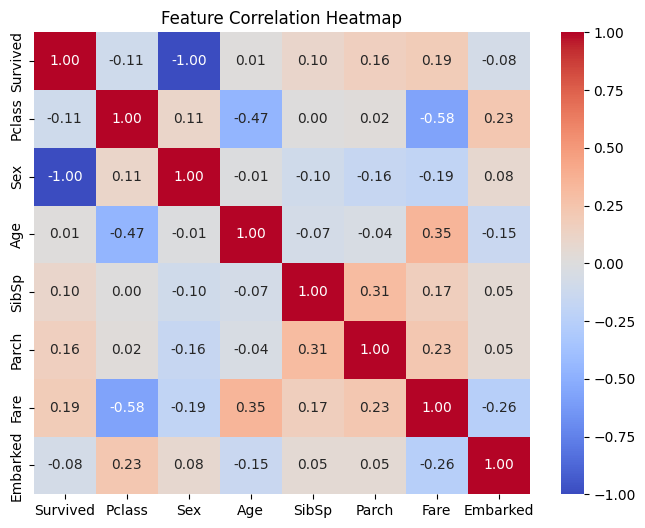

In [23]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
# Define prediction function
def predict_survival(model, passenger_info, label_encoders):
    """
    Predict survival for a single passenger.
    """
    df = pd.DataFrame([passenger_info])
    for col in ['Sex', 'Embarked']:
        if col in label_encoders:
            df[col] = label_encoders[col].transform(df[col])
    df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    prediction = model.predict(df)[0]
    return 'Survived' if prediction == 1 else 'Did not survive'


In [25]:
# Make predictions for first 10 passengers
for i in range(10):
    row = df.iloc[i].drop('Survived')
    row_dict = row.to_dict()
    row_dict['Sex'] = label_encoders['Sex'].inverse_transform([int(row_dict['Sex'])])[0]
    row_dict['Embarked'] = label_encoders['Embarked'].inverse_transform([int(row_dict['Embarked'])])[0]

    prediction = predict_survival(model, row_dict, label_encoders)
    print(f"Passenger {i+1}: {prediction}")

Passenger 1: Did not survive
Passenger 2: Survived
Passenger 3: Did not survive
Passenger 4: Did not survive
Passenger 5: Survived
Passenger 6: Did not survive
Passenger 7: Survived
Passenger 8: Did not survive
Passenger 9: Survived
Passenger 10: Did not survive


In [26]:
# Save model and encoders
with open("titanic_model.pkl", "wb") as f:
    pickle.dump((model, label_encoders), f)

In [27]:

import pickle

# Load the model and encoders
with open("titanic_model.pkl", "rb") as f:
    model, label_encoders = pickle.load(f)

In [28]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    passenger_info = {
        "Pclass": pclass,
        "Sex": sex,
        "Age": age,
        "SibSp": sibsp,
        "Parch": parch,
        "Fare": fare,
        "Embarked": embarked
    }

    df = pd.DataFrame([passenger_info])
    for col in ['Sex', 'Embarked']:
        if col in label_encoders:
            df[col] = label_encoders[col].transform(df[col])

    df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    prediction = model.predict(df)[0]

    return '✅ Survived' if prediction == 1 else '❌ Did not survive'


In [30]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [31]:
import gradio as gr

inputs = [
    gr.Dropdown([1, 2, 3], label="Passenger Class"),
    gr.Radio(["male", "female"], label="Sex"),
    gr.Slider(0, 100, value=30, label="Age"),
    gr.Slider(0, 10, value=0, step=1, label="Siblings/Spouses Aboard"),
    gr.Slider(0, 10, value=0, step=1, label="Parents/Children Aboard"),
    gr.Slider(0.0, 500.0, value=30.0, step=0.1, label="Fare"),
    gr.Radio(["S", "C", "Q"], label="Port of Embarkation")
]

In [32]:
interface = gr.Interface(
    fn=predict_survival,
    inputs=inputs,
    outputs="text",
    title="Titanic Survival Predictor",
    description="Enter passenger details to predict survival outcome."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7dcd9adb9b18cde1f5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
